<a href="https://colab.research.google.com/github/AmiftakhulI19/AmiftakhulI19/blob/main/Credit_Score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score Analysis
## Data Preparation and Create the Model
### Akhmad Miftakhul Ilmi - takhulilmi99@gmail.com

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Preparation

### Load and Check the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data
application_m = pd.read_excel('/content/drive/My Drive/FP SI Celerates/Dataset/application_history_m.xlsx')
application_f = pd.read_excel('/content/drive/My Drive/FP SI Celerates/Dataset/application_history_f.xlsx')

In [ ]:
application_m.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
2,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3
3,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2
4,5112956,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2


In [ ]:
application_f.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,PG,D,MH,1,0,0,0,NaN,1,62,1001


In [ ]:
application_m.shape

(144096, 18)

In [ ]:
application_f.shape

(294360, 18)

In [ ]:
application_all = pd.merge(application_m, application_f, how="outer")
application_all.shape

(438456, 18)

In [ ]:
application_all

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
2,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
3,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3
4,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438451,6840102,Perempuan,Tidak,Ya,0,135000.0,Pensioner,G,D,MH,1,0,0,0,NaN,1,62,1001
438452,6840222,Perempuan,Tidak,Tidak,0,103500.0,Bekerja,G,NM,MH,1,0,0,0,Laborers,1,44,8
438453,6841878,Perempuan,Tidak,Tidak,0,54000.0,Asosiasi komersial,PG,NM,PH,1,1,0,0,Sales staff,1,22,1
438454,6842765,Perempuan,Tidak,Ya,0,72000.0,Pensioner,G,M,MH,1,0,0,0,NaN,2,59,1001


### Checking Null Value

In [ ]:
application_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438456 entries, 0 to 438455
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Pekerjaan            304213 non-null  object 
 15  JmlAnggotaKeluarg

Null-value appear with a large portion (>100k) on variable "Pekerjaan". So variable "Pekerjaan" will be dropped

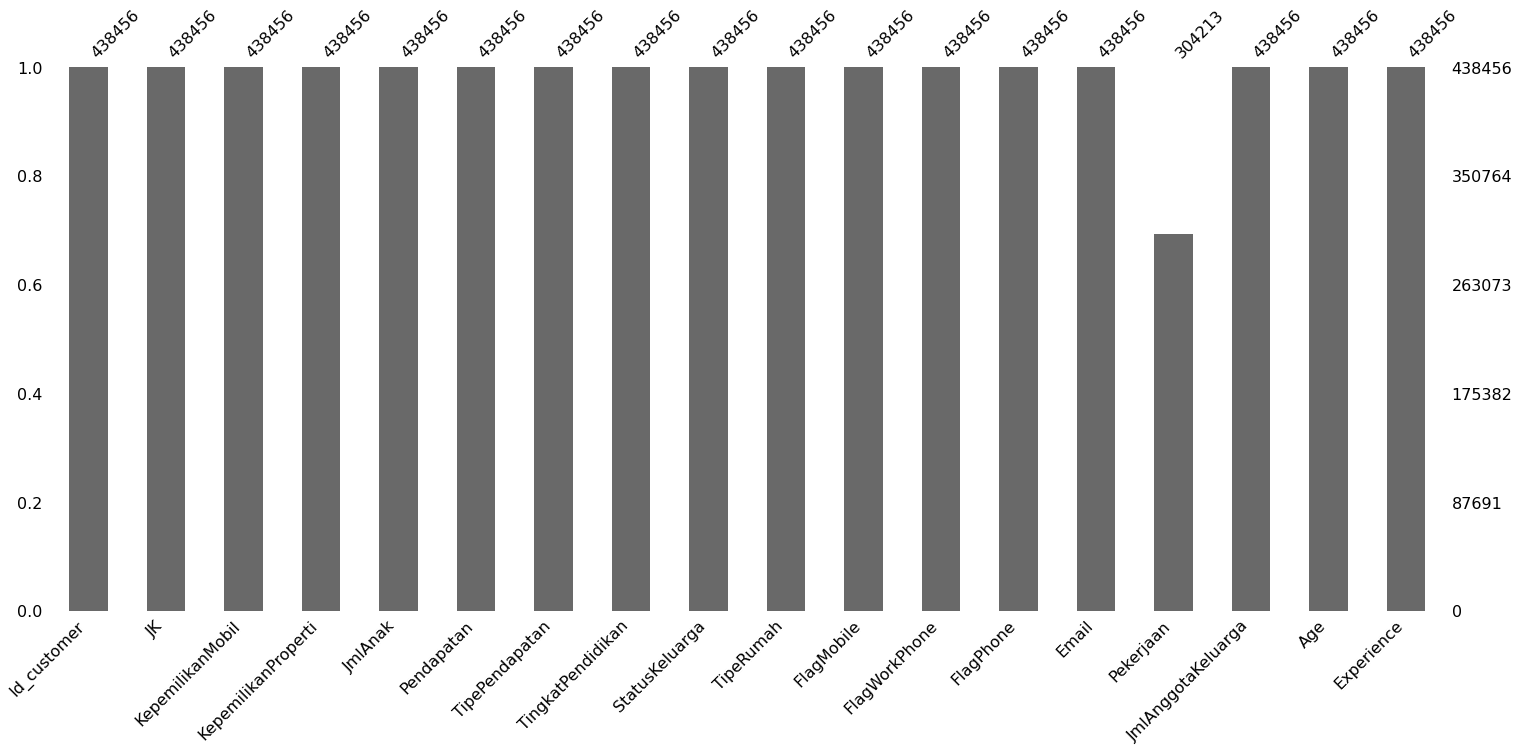

In [ ]:
msno.bar(application_all)
plt.show()

In [ ]:
application_all1 = application_all.drop('Pekerjaan', axis = 1)

In [ ]:
application_all1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438456 entries, 0 to 438455
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  JmlAnggotaKeluarga   438456 non-null  int64  
 15  Age              

In [ ]:
application_all1.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
2,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
3,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3
4,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2


### Check for Duplicate

In [ ]:
#How Many Unique on Customer ID
dupp_app = application_all1.pivot_table(columns=['Id_customer'], aggfunc='size')
print(dupp_app)

Id_customer
5008804    1
5008805    2
5008806    1
5008808    1
5008809    1
          ..
7999660    1
7999696    1
7999738    1
7999784    1
7999952    1
Length: 438310, dtype: int64


In [ ]:
#Unique Value in Each Variable
pd.Series({col:application_all1[col].nunique() for col in application_all1})

Id_customer            438310
JK                          2
KepemilikanMobil            2
KepemilikanProperti         2
JmlAnak                    12
Pendapatan                866
TipePendapatan              5
TingkatPendidikan           3
StatusKeluarga              3
TipeRumah                   5
FlagMobile                  1
FlagWorkPhone               2
FlagPhone                   2
Email                       2
JmlAnggotaKeluarga         13
Age                        49
Experience                 49
dtype: int64

In [ ]:
#Drop duplicates on Id_customer
application_all_2 = application_all1.drop_duplicates(subset='Id_customer')

In [ ]:
application_all_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438310 entries, 0 to 438455
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438310 non-null  int64  
 1   JK                   438310 non-null  object 
 2   KepemilikanMobil     438310 non-null  object 
 3   KepemilikanProperti  438310 non-null  object 
 4   JmlAnak              438310 non-null  int64  
 5   Pendapatan           438310 non-null  float64
 6   TipePendapatan       438310 non-null  object 
 7   TingkatPendidikan    438310 non-null  object 
 8   StatusKeluarga       438310 non-null  object 
 9   TipeRumah            438310 non-null  object 
 10  FlagMobile           438310 non-null  int64  
 11  FlagWorkPhone        438310 non-null  int64  
 12  FlagPhone            438310 non-null  int64  
 13  Email                438310 non-null  int64  
 14  JmlAnggotaKeluarga   438310 non-null  int64  
 15  Age              

### Load Credit History Data (Last Row)

In [ ]:
credit_history = pd.read_csv('/content/drive/My Drive/FP SI Celerates/Dataset/credit_history.csv')

In [ ]:
credit_history

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


In [ ]:
credit_history['Overdue'].value_counts()

0                          821230
Tidak memiliki pinjaman    208755
1                           10936
5                            1677
2                             849
3                             317
4                             222
Name: Overdue, dtype: int64

In [ ]:
#Drop ID customer that have the status "Tidak memiliki pinjaman"
credit_history_1 = credit_history[credit_history.Overdue != 'Tidak memiliki pinjaman']
credit_history_1['Overdue'].value_counts()

0    821230
1     10936
5      1677
2       849
3       317
4       222
Name: Overdue, dtype: int64

In [ ]:
credit_history_sort = credit_history_1.sort_values(['Id_customer','Overdue'])

In [ ]:
credit_history_sort

,Id_customer,Overdue
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
5,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


In [ ]:
from pandas.core.algorithms import rank
credit_history_2 = credit_history_sort.drop_duplicates(subset='Id_customer',keep='last')

In [ ]:
credit_history_2['Overdue'].value_counts()

0    35976
1     4617
2      328
5      193
3       87
4       48
Name: Overdue, dtype: int64

In [ ]:
credit_history_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41249 entries, 3 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_customer  41249 non-null  int64 
 1   Overdue      41249 non-null  object
dtypes: int64(1), object(1)
memory usage: 966.8+ KB


In [ ]:
credit_history_2

,Id_customer,Overdue
3,5001711,0
22,5001712,0
141,5001717,0
154,5001718,1
223,5001719,0
...,...,...
1043861,5150480,0
1043922,5150482,0
1043953,5150484,0
1043955,5150485,0


### Join Application Table and Credit History Table

In [ ]:
application_history = application_all_2.merge(credit_history_2, on='Id_customer', validate = 'one_to_one')
application_history

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1
2,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3,0
3,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0
4,5112956,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,5149055,Perempuan,Tidak,Ya,0,112500.0,Asosiasi komersial,G,M,MH,1,1,1,0,2,43,7,2
32906,5149056,Perempuan,Tidak,Ya,0,112500.0,Asosiasi komersial,G,M,MH,1,1,1,0,2,43,7,2
32907,5149834,Perempuan,Tidak,Ya,0,157500.0,Asosiasi komersial,PG,M,MH,1,0,1,1,2,34,4,5
32908,5149838,Perempuan,Tidak,Ya,0,157500.0,Pensioner,PG,M,MH,1,0,1,1,2,34,4,5


In [ ]:
application_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32910 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          32910 non-null  int64  
 1   JK                   32910 non-null  object 
 2   KepemilikanMobil     32910 non-null  object 
 3   KepemilikanProperti  32910 non-null  object 
 4   JmlAnak              32910 non-null  int64  
 5   Pendapatan           32910 non-null  float64
 6   TipePendapatan       32910 non-null  object 
 7   TingkatPendidikan    32910 non-null  object 
 8   StatusKeluarga       32910 non-null  object 
 9   TipeRumah            32910 non-null  object 
 10  FlagMobile           32910 non-null  int64  
 11  FlagWorkPhone        32910 non-null  int64  
 12  FlagPhone            32910 non-null  int64  
 13  Email                32910 non-null  int64  
 14  JmlAnggotaKeluarga   32910 non-null  int64  
 15  Age                  32910 non-null 

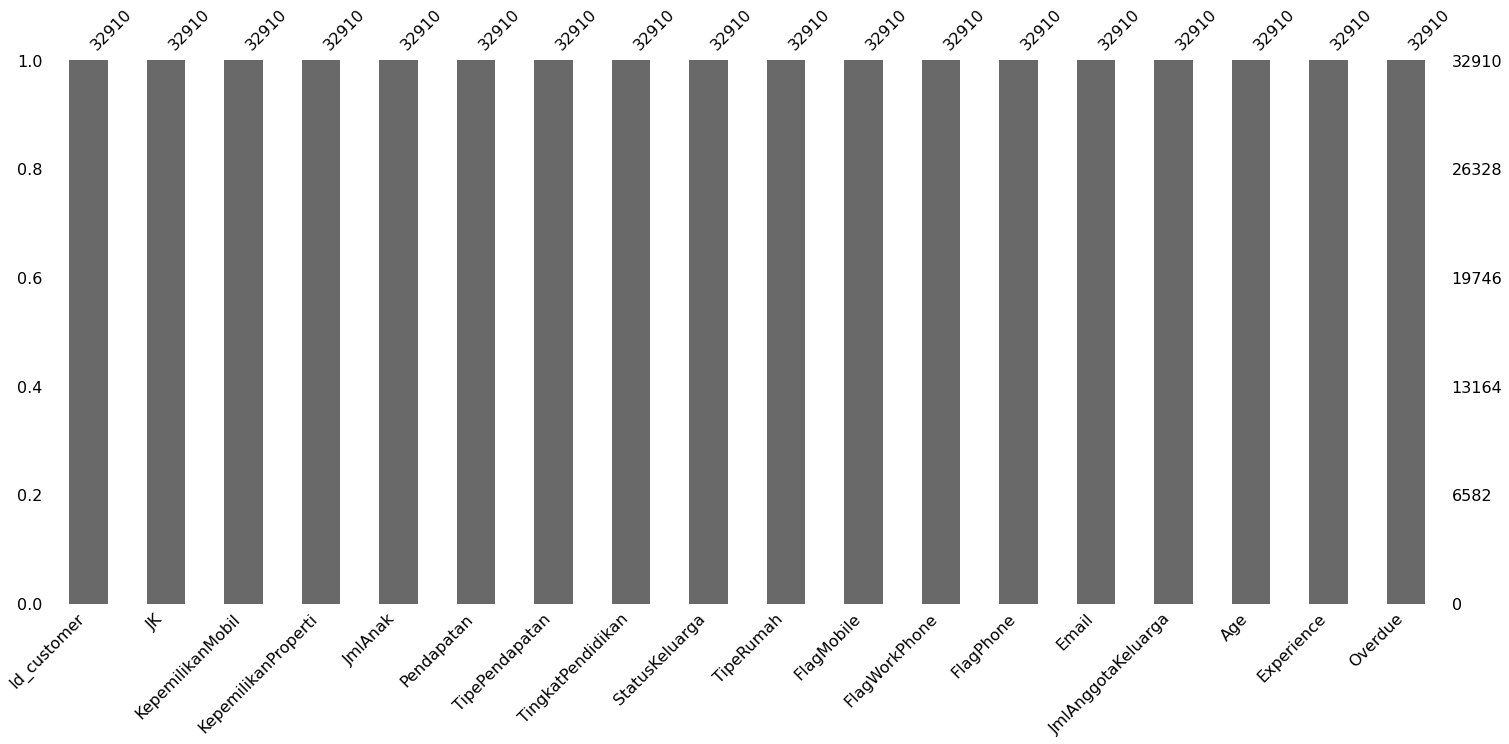

In [ ]:
msno.bar(application_history)
plt.show()

In [ ]:
application_history.describe()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
count,3.291000e+04,32910.000000,3.291000e+04,32910.0,32910.000000,32910.000000,32910.000000,32910.000000,32910.000000,32910.000000
mean,5.077989e+06,0.427864,1.858059e+05,1.0,0.224005,0.292404,0.090550,2.194926,43.858280,176.563810
std,4.186922e+04,0.741831,1.011435e+05,0.0,0.416932,0.454874,0.286972,0.911178,11.557325,373.621133
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,5.041980e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,3.000000
50%,5.069434e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,7.000000
75%,5.114626e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,16.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,69.000000,1001.000000


In [ ]:
application_history['Overdue'].value_counts()

0    28696
1     3609
2      306
5      178
3       75
4       46
Name: Overdue, dtype: int64

In [ ]:
application_history_2 = application_history.drop('Id_customer', axis = 1)

In [ ]:
#Check for duplicate
application_history_2.duplicated(keep='first').sum()

22087

In [ ]:
application_history_3 = application_history_2.drop_duplicates(keep='first')

In [ ]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JK                   10823 non-null  object 
 1   KepemilikanMobil     10823 non-null  object 
 2   KepemilikanProperti  10823 non-null  object 
 3   JmlAnak              10823 non-null  int64  
 4   Pendapatan           10823 non-null  float64
 5   TipePendapatan       10823 non-null  object 
 6   TingkatPendidikan    10823 non-null  object 
 7   StatusKeluarga       10823 non-null  object 
 8   TipeRumah            10823 non-null  object 
 9   FlagMobile           10823 non-null  int64  
 10  FlagWorkPhone        10823 non-null  int64  
 11  FlagPhone            10823 non-null  int64  
 12  Email                10823 non-null  int64  
 13  JmlAnggotaKeluarga   10823 non-null  int64  
 14  Age                  10823 non-null  int64  
 15  Experience           10823 non-null 

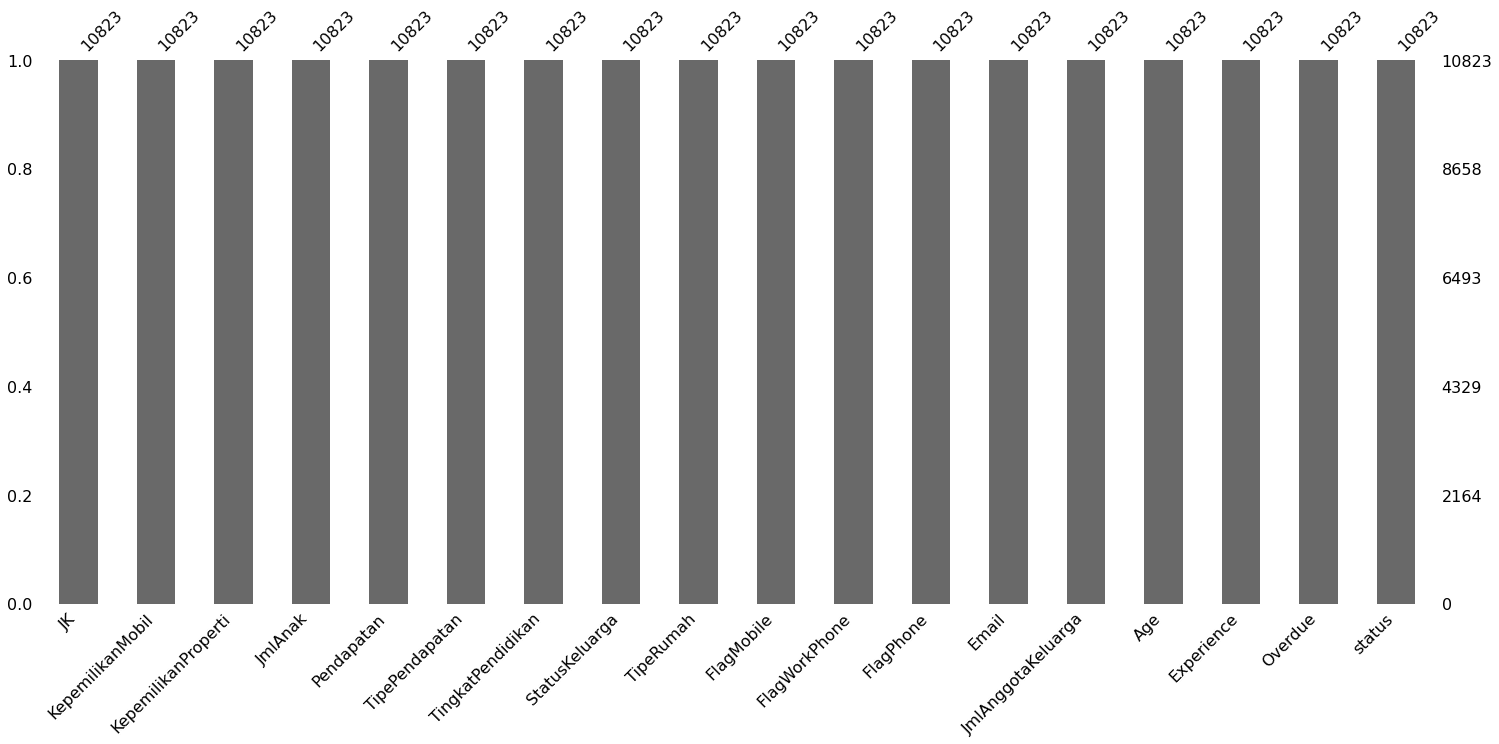

In [ ]:
msno.bar(application_history_3)
plt.show()

### Complete The Application History Table

In [ ]:
application_history_3['status'] = np.where(application_history_3['Overdue'].str.contains('0'), 0, 1)

<ipython-input-57-770ef70efbc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_history_3['status'] = np.where(application_history_3['Overdue'].str.contains('0'), 0, 1)


In [ ]:
application_history_3['status'].value_counts()

0    8333
1    2490
Name: status, dtype: int64

In [ ]:
application_history_3.head()

,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue,status
0,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1,1
2,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3,0,0
3,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0,0
5,Laki-laki,Ya,Ya,0,135000.0,Asosiasi komersial,G,M,MH,1,0,0,0,2,49,3,0,0
10,Laki-laki,Ya,Ya,3,270000.0,Bekerja,G,M,MH,1,0,0,0,5,35,3,0,0


In [ ]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JK                   10823 non-null  object 
 1   KepemilikanMobil     10823 non-null  object 
 2   KepemilikanProperti  10823 non-null  object 
 3   JmlAnak              10823 non-null  int64  
 4   Pendapatan           10823 non-null  float64
 5   TipePendapatan       10823 non-null  object 
 6   TingkatPendidikan    10823 non-null  object 
 7   StatusKeluarga       10823 non-null  object 
 8   TipeRumah            10823 non-null  object 
 9   FlagMobile           10823 non-null  int64  
 10  FlagWorkPhone        10823 non-null  int64  
 11  FlagPhone            10823 non-null  int64  
 12  Email                10823 non-null  int64  
 13  JmlAnggotaKeluarga   10823 non-null  int64  
 14  Age                  10823 non-null  int64  
 15  Experience           10823 non-null 

In [ ]:
application_history_3['Pendapatan'] = (application_history_3['Pendapatan']).astype(int)

<ipython-input-61-31966bf68a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_history_3['Pendapatan'] = (application_history_3['Pendapatan']).astype(int)


In [ ]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   10823 non-null  object
 1   KepemilikanMobil     10823 non-null  object
 2   KepemilikanProperti  10823 non-null  object
 3   JmlAnak              10823 non-null  int64 
 4   Pendapatan           10823 non-null  int64 
 5   TipePendapatan       10823 non-null  object
 6   TingkatPendidikan    10823 non-null  object
 7   StatusKeluarga       10823 non-null  object
 8   TipeRumah            10823 non-null  object
 9   FlagMobile           10823 non-null  int64 
 10  FlagWorkPhone        10823 non-null  int64 
 11  FlagPhone            10823 non-null  int64 
 12  Email                10823 non-null  int64 
 13  JmlAnggotaKeluarga   10823 non-null  int64 
 14  Age                  10823 non-null  int64 
 15  Experience           10823 non-null  int64 
 16  Over

In [ ]:
#Create dataset that only include continous variable
data_corr = application_history_3.drop(['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TingkatPendidikan', 
                                        'StatusKeluarga', 'TipeRumah', 'FlagWorkPhone', 'FlagPhone', 'Email', 'Overdue', 'status'], axis = 1)

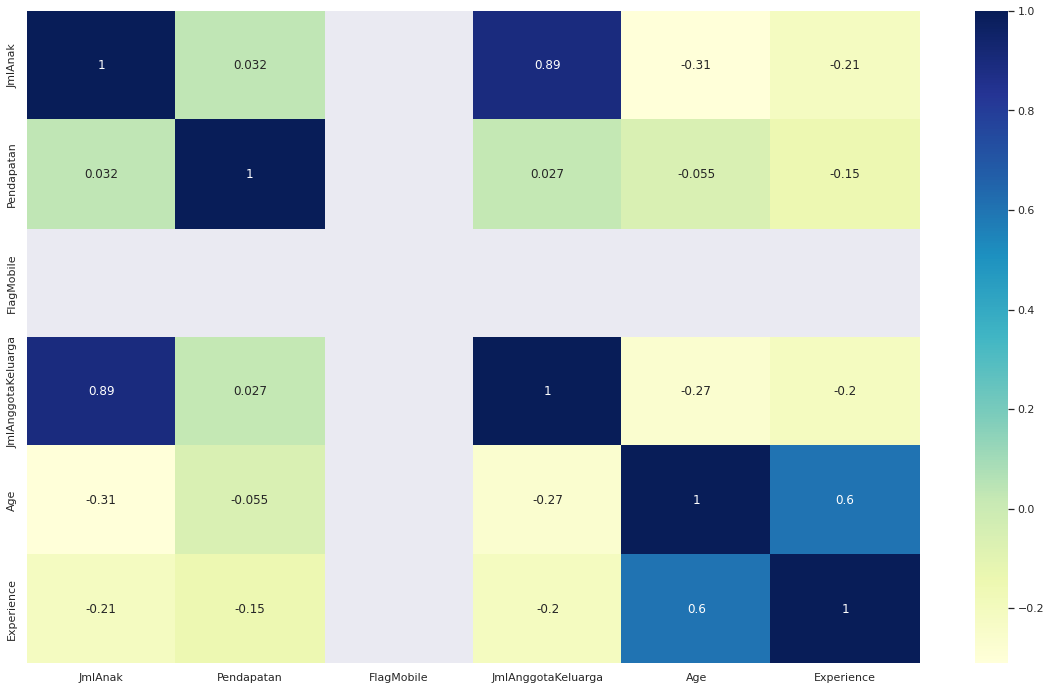

In [ ]:
#Correlation between continous variable 
sns.set(rc={'figure.figsize':(20,12)})
dataplot = sns.heatmap(data_corr.corr(), cmap="YlGnBu", annot=True)

Based on the correlation above we can avoid multicolinearity by dropping some variables that have correlation>0.5 and Nan correlation ('JmlAnak', 'Age', and 'FlagMobile') , so variables that dropped for the modeling are:
1. Id_customer
2. Pekerjaan
3. JmlAnak
4. Age
5. FlagMobile

In [ ]:
application_history_4 = application_history_3.drop(['JmlAnak', 'Age', 'FlagMobile'], axis = 1)
application_history_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   10823 non-null  object
 1   KepemilikanMobil     10823 non-null  object
 2   KepemilikanProperti  10823 non-null  object
 3   Pendapatan           10823 non-null  int64 
 4   TipePendapatan       10823 non-null  object
 5   TingkatPendidikan    10823 non-null  object
 6   StatusKeluarga       10823 non-null  object
 7   TipeRumah            10823 non-null  object
 8   FlagWorkPhone        10823 non-null  int64 
 9   FlagPhone            10823 non-null  int64 
 10  Email                10823 non-null  int64 
 11  JmlAnggotaKeluarga   10823 non-null  int64 
 12  Experience           10823 non-null  int64 
 13  Overdue              10823 non-null  object
 14  status               10823 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.6+ MB


### Outlier Remover

##### Pendapatan

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


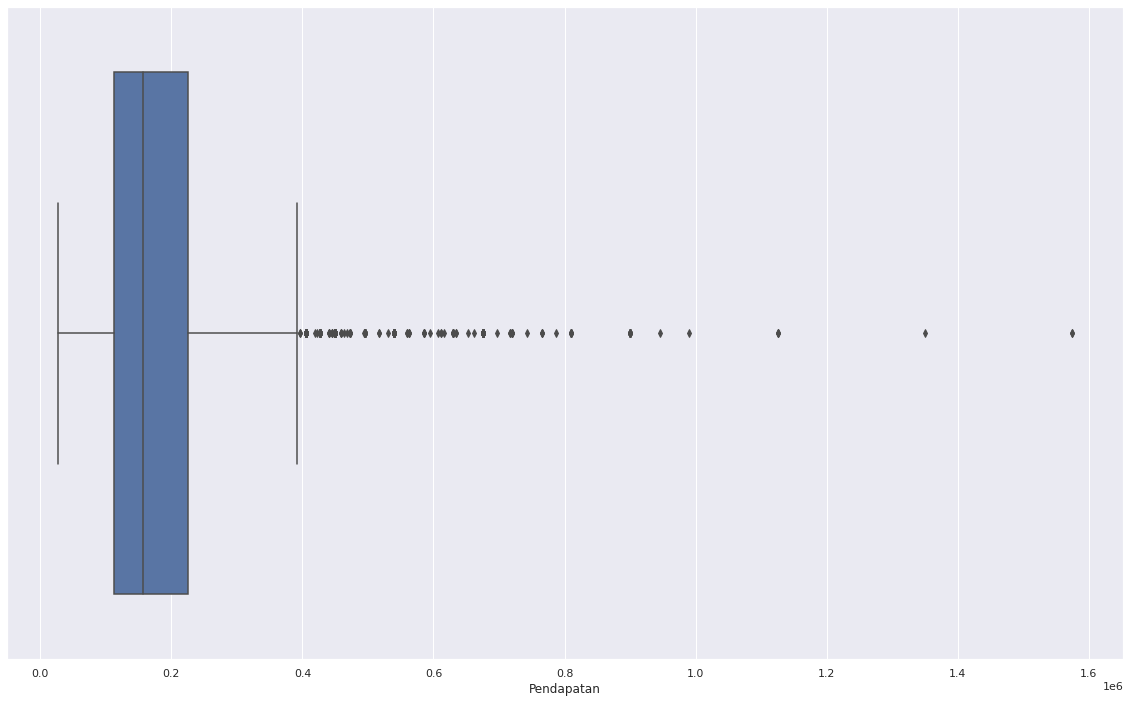

In [ ]:
# Box Plot Pendapatan
sns.boxplot(application_history_4['Pendapatan'])

In [ ]:
#Outlier
#Using Inter Quartil Range
# IQR Pendapatan
percentile25 = application_history_4['Pendapatan'].quantile(0.25)
percentile75 = application_history_4['Pendapatan'].quantile(0.75)
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
application_history_4[application_history_4['Pendapatan'] > upper_limit]
application_history_4[application_history_4['Pendapatan'] < lower_limit]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status


In [ ]:
application_history_5 = application_history_4[application_history_4['Pendapatan'] < upper_limit]
application_history_5.shape

(10449, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


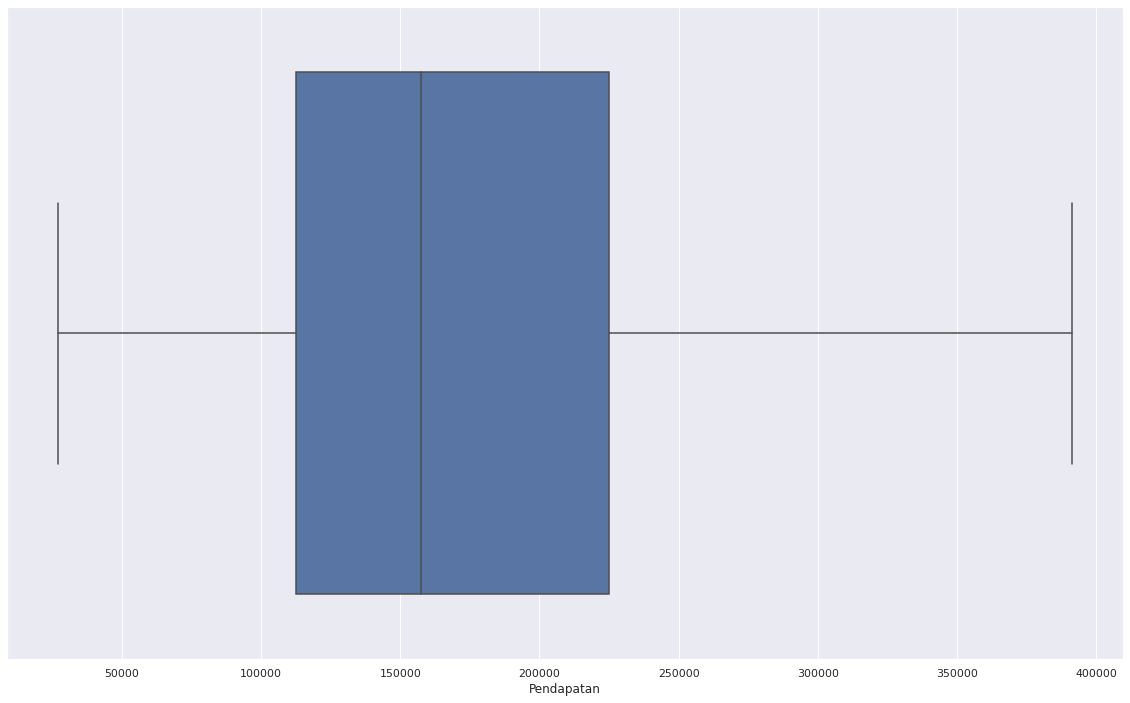

In [ ]:
# Box Plot Pendapatan after outlier cleaning
sns.boxplot(application_history_5['Pendapatan'])

##### JmlAnggotaKeluarga

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


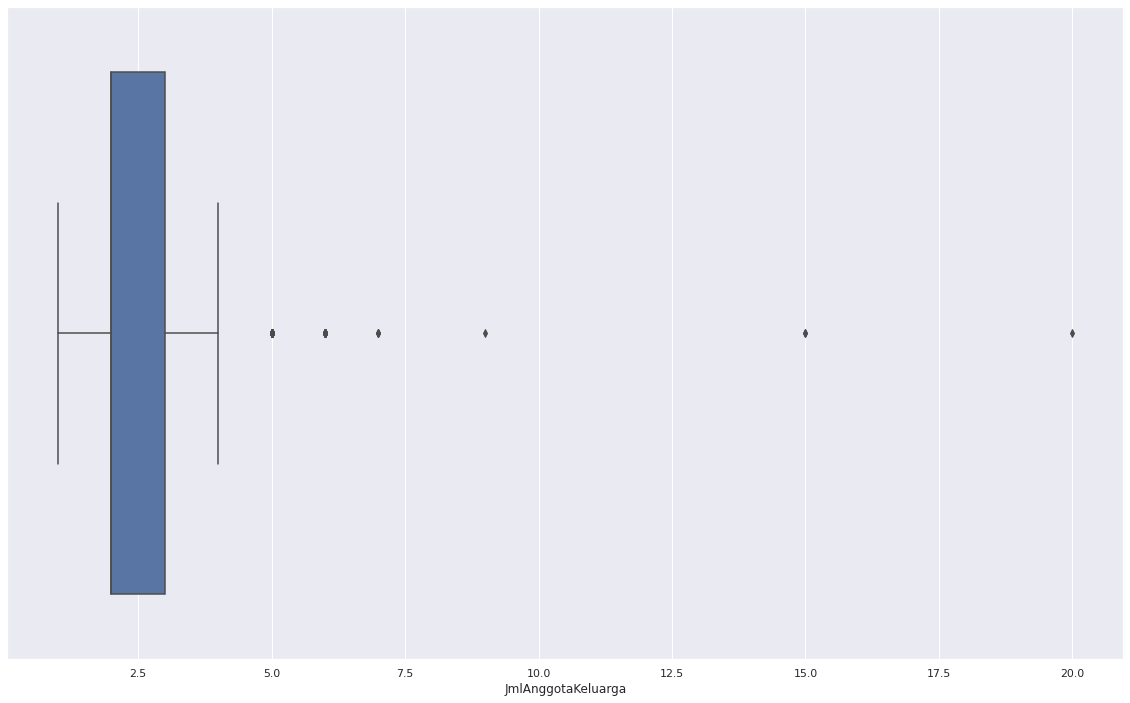

In [ ]:
# Box Plot JmlAnggotaKeluarga
sns.boxplot(application_history_5['JmlAnggotaKeluarga'])

In [ ]:
#IQR JmlAnggotaKeluarga
percentile25_JAK = application_history_5['JmlAnggotaKeluarga'].quantile(0.25)
percentile75_JAK = application_history_5['JmlAnggotaKeluarga'].quantile(0.75)
iqr_JAK = percentile75_JAK - percentile25_JAK

In [ ]:
upper_limit_JAK = percentile75_JAK + 1.5 * iqr_JAK
lower_limit_JAK = percentile25_JAK - 1.5 * iqr_JAK

In [ ]:
application_history_5[application_history_5['JmlAnggotaKeluarga'] > upper_limit_JAK]
application_history_5[application_history_5['JmlAnggotaKeluarga'] < lower_limit_JAK]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status


In [ ]:
application_history_6 = application_history_5[application_history_5['JmlAnggotaKeluarga'] < upper_limit_JAK]
application_history_6.shape

(10296, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


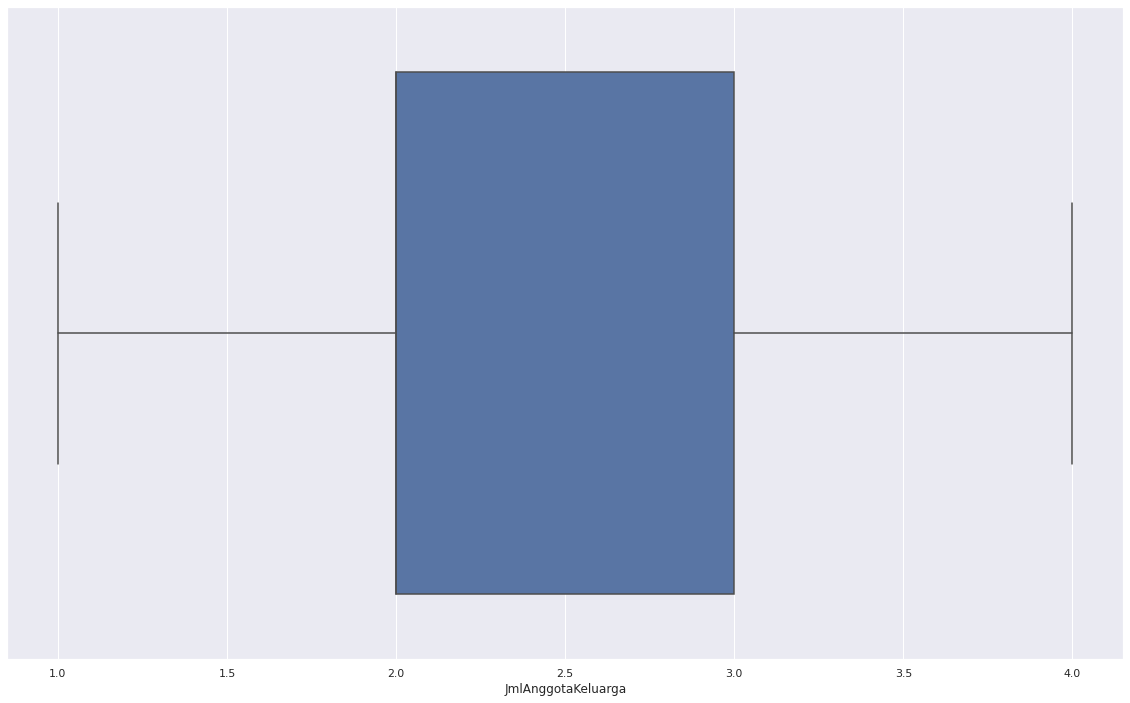

In [ ]:
# Box Plot Pendapatan after Outlier Cleaning
sns.boxplot(application_history_6['JmlAnggotaKeluarga'])

##### Experience

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


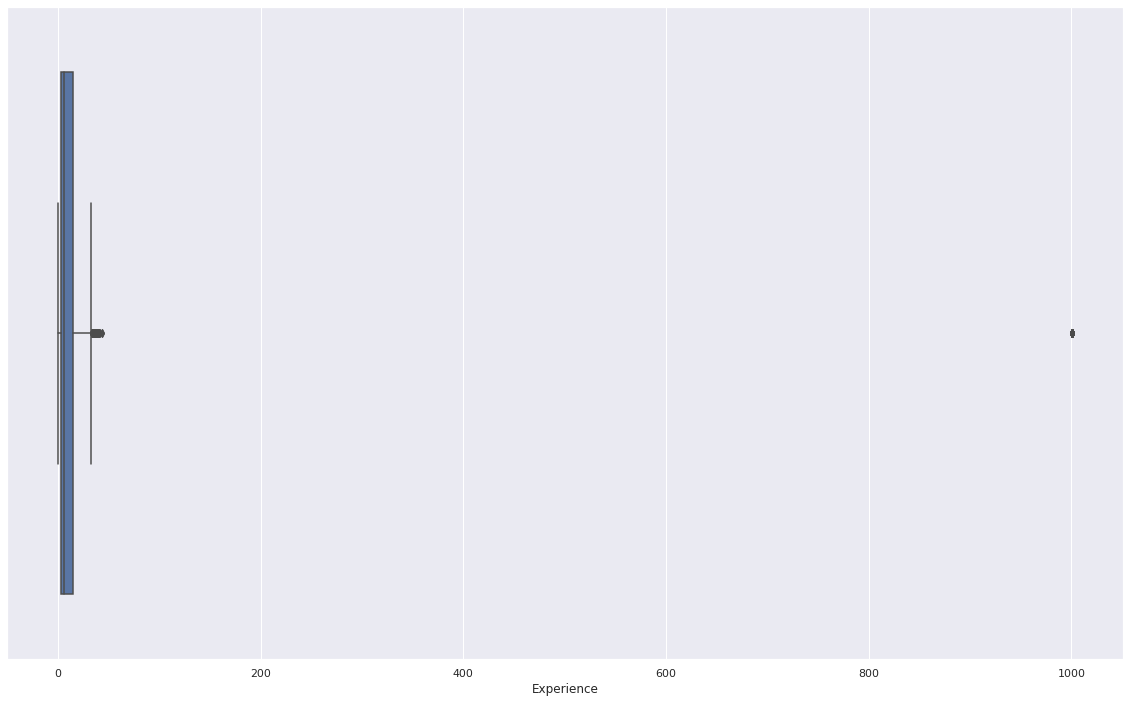

In [ ]:
# Box Plot Experience
sns.boxplot(application_history_6['Experience'])

In [ ]:
#IQR Experience
percentile25_Ex = application_history_6['Experience'].quantile(0.25)
percentile75_Ex = application_history_6['Experience'].quantile(0.75)
iqr_Ex = percentile75_Ex - percentile25_Ex

In [ ]:
upper_limit_Ex = percentile75_Ex + 1.5 * iqr_Ex
lower_limit_Ex = percentile25_Ex - 1.5 * iqr_Ex

In [ ]:
application_history_6[application_history_6['Experience'] > upper_limit_Ex]
application_history_6[application_history_6['Experience'] < lower_limit_Ex]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status


In [ ]:
application_history_7 = application_history_6[application_history_6['Experience'] < upper_limit_Ex]
application_history_7.shape

(8552, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


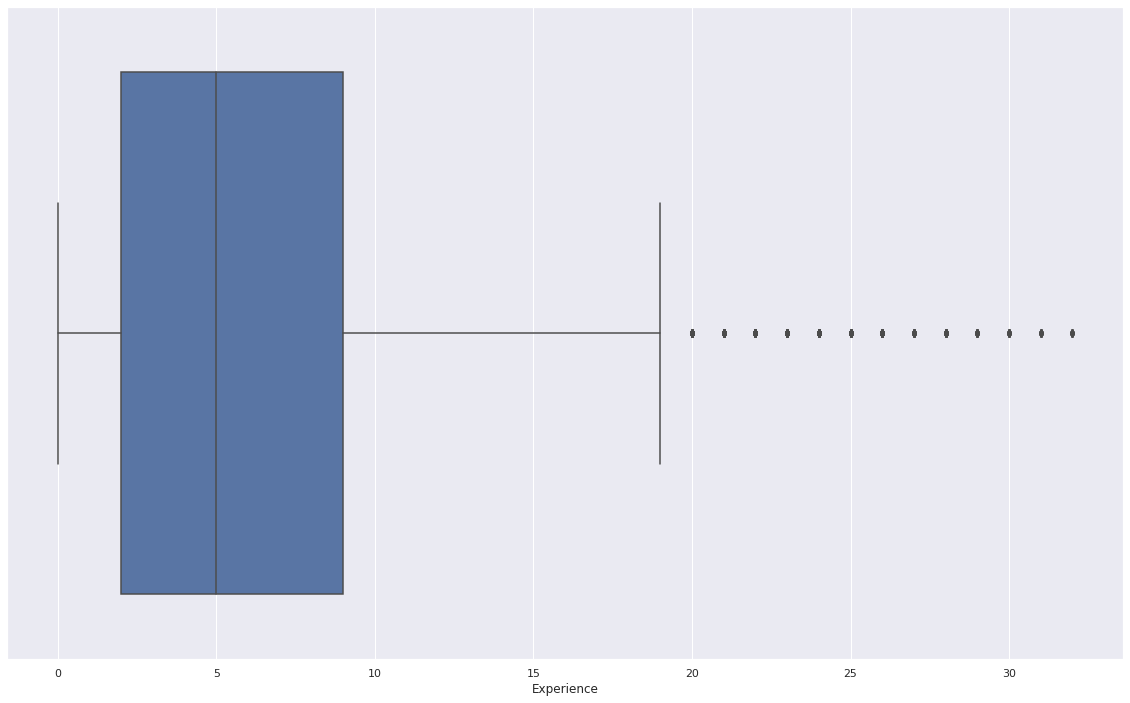

In [ ]:
# Box Plot Pendapatan after Outlier Cleaning
sns.boxplot(application_history_7['Experience'])

#### Delete the rest of the outlier row

In [ ]:
application_history_9 = application_history_7[application_history_7['Experience'] < 20]

In [ ]:
application_history_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 2 to 32909
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   8116 non-null   object
 1   KepemilikanMobil     8116 non-null   object
 2   KepemilikanProperti  8116 non-null   object
 3   Pendapatan           8116 non-null   int64 
 4   TipePendapatan       8116 non-null   object
 5   TingkatPendidikan    8116 non-null   object
 6   StatusKeluarga       8116 non-null   object
 7   TipeRumah            8116 non-null   object
 8   FlagWorkPhone        8116 non-null   int64 
 9   FlagPhone            8116 non-null   int64 
 10  Email                8116 non-null   int64 
 11  JmlAnggotaKeluarga   8116 non-null   int64 
 12  Experience           8116 non-null   int64 
 13  Overdue              8116 non-null   object
 14  status               8116 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1014.5+ KB


In [ ]:
application_history_9.select_dtypes(object).reset_index()

,index,JK,KepemilikanMobil,KepemilikanProperti,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,Overdue
0,2,Laki-laki,Ya,Ya,Bekerja,G,M,MH,0
1,3,Laki-laki,Ya,Ya,Bekerja,PG,M,MH,0
2,5,Laki-laki,Ya,Ya,Asosiasi komersial,G,M,MH,0
3,18,Laki-laki,Ya,Ya,Asosiasi komersial,G,M,MH,0
4,26,Laki-laki,Ya,Ya,Asosiasi komersial,G,M,MH,1
...,...,...,...,...,...,...,...,...,...
8111,32903,Perempuan,Tidak,Ya,Bekerja,G,M,MH,2
8112,32905,Perempuan,Tidak,Ya,Asosiasi komersial,G,M,MH,2
8113,32907,Perempuan,Tidak,Ya,Asosiasi komersial,PG,M,MH,5
8114,32908,Perempuan,Tidak,Ya,Pensioner,PG,M,MH,5


In [ ]:
application_history_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 2 to 32909
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   8116 non-null   int64 
 1   KepemilikanMobil     8116 non-null   int64 
 2   KepemilikanProperti  8116 non-null   int64 
 3   Pendapatan           8116 non-null   int64 
 4   TipePendapatan       8116 non-null   int64 
 5   TingkatPendidikan    8116 non-null   int64 
 6   StatusKeluarga       8116 non-null   int64 
 7   TipeRumah            8116 non-null   int64 
 8   FlagWorkPhone        8116 non-null   int64 
 9   FlagPhone            8116 non-null   int64 
 10  Email                8116 non-null   int64 
 11  JmlAnggotaKeluarga   8116 non-null   int64 
 12  Experience           8116 non-null   int64 
 13  Overdue              8116 non-null   object
 14  status               8116 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 1.2+ MB


### Encode The Data (Label Encoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["JK","KepemilikanProperti", "KepemilikanMobil", "TipePendapatan", "TingkatPendidikan", "TipeRumah", "StatusKeluarga"]:
    application_history_9[col] = LabelEncoder().fit_transform(application_history_9[col])

<ipython-input-247-9b869e3cedf4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_history_9[col] = LabelEncoder().fit_transform(application_history_9[col])


In [ ]:
application_history_9

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status
2,0,1,1,112500,1,0,1,1,0,0,0,2,3,0,0
3,0,1,1,270000,1,1,1,1,1,1,1,2,2,0,0
5,0,1,1,135000,0,0,1,1,0,0,0,2,3,0,0
18,0,1,1,112500,0,0,1,1,0,1,0,2,12,0,0
26,0,1,1,360000,0,0,1,1,0,1,0,2,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32903,1,0,1,180000,1,0,1,1,0,0,0,2,10,2,1
32905,1,0,1,112500,0,0,1,1,1,1,0,2,7,2,1
32907,1,0,1,157500,0,1,1,1,0,1,1,2,4,5,1
32908,1,0,1,157500,4,1,1,1,0,1,1,2,4,5,1


### Scaling Variable (MinMax Scaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col=['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TingkatPendidikan', 'StatusKeluarga', 
     'TipeRumah', 'FlagWorkPhone', 'FlagPhone', 'Email', 'Overdue', 'status','Pendapatan','JmlAnggotaKeluarga','Experience']
scaler=MinMaxScaler()

application_history_9[col]=scaler.fit_transform(application_history_9[col])
application_history_9.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status
2,0.0,1.0,1.0,0.234568,0.25,0.0,0.5,0.25,0.0,0.0,0.0,0.333333,0.157895,0.0,0.0
3,0.0,1.0,1.0,0.666667,0.25,0.5,0.5,0.25,1.0,1.0,1.0,0.333333,0.105263,0.0,0.0
5,0.0,1.0,1.0,0.296296,0.00,0.0,0.5,0.25,0.0,0.0,0.0,0.333333,0.157895,0.0,0.0
18,0.0,1.0,1.0,0.234568,0.00,0.0,0.5,0.25,0.0,1.0,0.0,0.333333,0.631579,0.0,0.0
26,0.0,1.0,1.0,0.913580,0.00,0.0,0.5,0.25,0.0,1.0,0.0,0.333333,0.789474,0.2,1.0


### Handling Imbalance Data

#### Smote

In [ ]:
x = application_history_9.drop(['status', 'Overdue'], axis=1)
y = application_history_9['status']

print(x.shape)
print(y.shape)
print(y.value_counts())

(8116, 13)
(8116,)
0.0    6251
1.0    1865
Name: status, dtype: int64


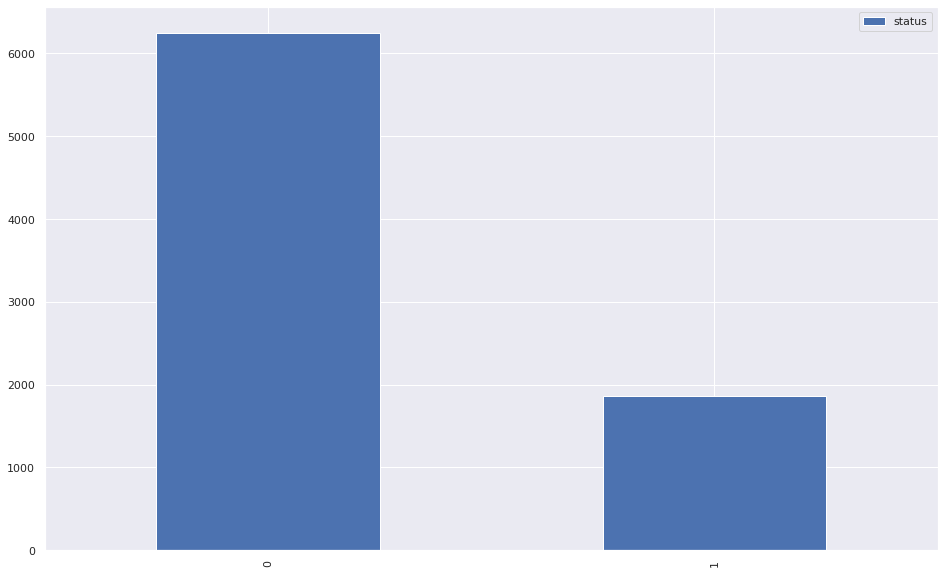

In [ ]:
fig = plt.figure(figsize = (16, 10))
y.value_counts().plot(kind = 'bar')
plt.legend()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

x_sm, y_sm = smote.fit_resample(x,y)

print(y_sm.value_counts())

0.0    6251
1.0    6251
Name: status, dtype: int64


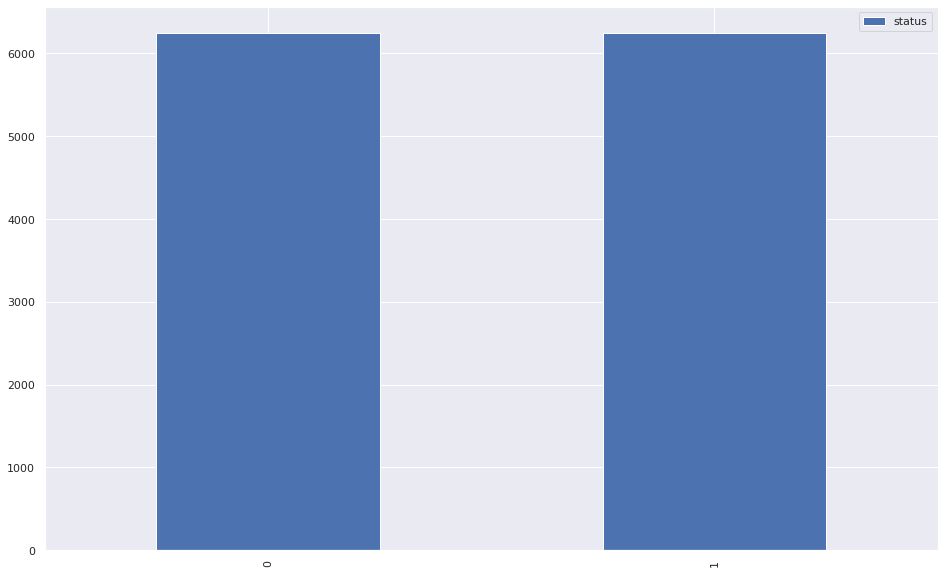

In [ ]:
fig = plt.figure(figsize = (16, 10))
y_sm.value_counts().plot(kind = 'bar')
plt.legend()

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=7)
chi2_selector.fit(x_sm, y_sm)

SelectKBest(k=7, score_func=<function chi2 at 0x7f1658fee0d0>)

In [ ]:
cols = chi2_selector.get_support(indices=True)
x_f = x_sm.iloc[:,cols]

In [ ]:
x_f.head()

,JK,KepemilikanMobil,KepemilikanProperti,FlagWorkPhone,FlagPhone,Email,Experience
0,0.0,1.0,1.0,0.0,0.0,0.0,0.157895
1,0.0,1.0,1.0,1.0,1.0,1.0,0.105263
2,0.0,1.0,1.0,0.0,0.0,0.0,0.157895
3,0.0,1.0,1.0,0.0,1.0,0.0,0.631579
4,0.0,1.0,1.0,0.0,1.0,0.0,0.789474


## Model

### Cross Validation (K-Fold)

In [ ]:
from sklearn.metrics import f1_score
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
  _scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
  plt.figure(figsize=(16,8))
  labels = ["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"]
  X_axis = np.arange(len(labels))
  ax = plt.gca()
  plt.ylim(0.40000, 1)
  plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
  plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
  plt.title(plot_title, fontsize=30)
  plt.xticks(X_axis, labels)
  plt.xlabel(x_label, fontsize=14)
  plt.ylabel(y_label, fontsize=14)
  plt.legend()
  plt.grid(True)
  plt.show()

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, x_sm, y_sm, 10)
print(decision_tree_result)

{'Training Accuracy scores': array([0.92587326, 0.93529464, 0.92987913, 0.90072876, 0.89984003,
       0.89619623, 0.90206186, 0.89788482, 0.89815144, 0.90019552]), 'Mean Training Accuracy': 90.86105685024546, 'Training Precision scores': array([0.98482396, 0.98765186, 0.98457223, 0.98121665, 0.98097071,
       0.97894284, 0.98066298, 0.97902846, 0.9813064 , 0.98078155]), 'Mean Training Precision': 0.9819957649748963, 'Training Recall scores': array([0.86509065, 0.8816    , 0.87344472, 0.81709918, 0.81549947,
       0.80981159, 0.82029861, 0.81318877, 0.8117668 , 0.8163882 ]), 'Mean Training Recall': 0.8324187984358336, 'Training F1 scores': array([0.92108251, 0.93161751, 0.92568522, 0.89166909, 0.89061438,
       0.88638132, 0.89334108, 0.88843577, 0.8885214 , 0.89106606]), 'Mean Training F1 Score': 0.9008414348656917, 'Validation Accuracy scores': array([0.5059952 , 0.36930456, 0.3912    , 0.7872    , 0.7768    ,
       0.8184    , 0.7656    , 0.8208    , 0.7904    , 0.784     ]), 'M

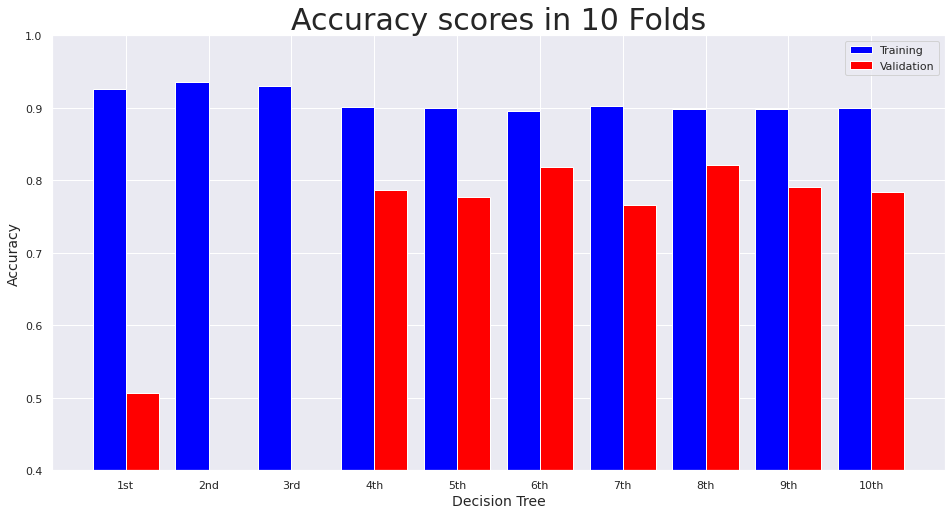

In [ ]:
model = "Decision Tree"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc_result = cross_validation(nbc, x_sm, y_sm, 10)
print(nbc_result)

{'Training Accuracy scores': array([0.5558617 , 0.56572749, 0.57323143, 0.55412371, 0.55030217,
       0.54870245, 0.54816921, 0.54639175, 0.5452364 , 0.5465695 ]), 'Mean Training Accuracy': 55.34315818449349, 'Training Precision scores': array([0.54710199, 0.55587479, 0.5657307 , 0.54676701, 0.54406727,
       0.54074955, 0.54165386, 0.53937839, 0.53813877, 0.53944595]), 'Mean Training Precision': 0.5458908282713734, 'Training Recall scores': array([0.64930679, 0.65351111, 0.63028795, 0.6327764 , 0.62104515,
       0.6462851 , 0.62637753, 0.63544259, 0.63828653, 0.63686456]), 'Mean Training Recall': 0.6370183702650393, 'Training F1 scores': array([0.5938389 , 0.60075176, 0.59626703, 0.58663591, 0.58001328,
       0.58882591, 0.58094296, 0.58348294, 0.58394991, 0.58412129]), 'Mean Training F1 Score': 0.5878829892070974, 'Validation Accuracy scores': array([0.50119904, 0.35731415, 0.3032    , 0.5112    , 0.5344    ,
       0.5488    , 0.5272    , 0.5656    , 0.5504    , 0.5568    ]), 'M

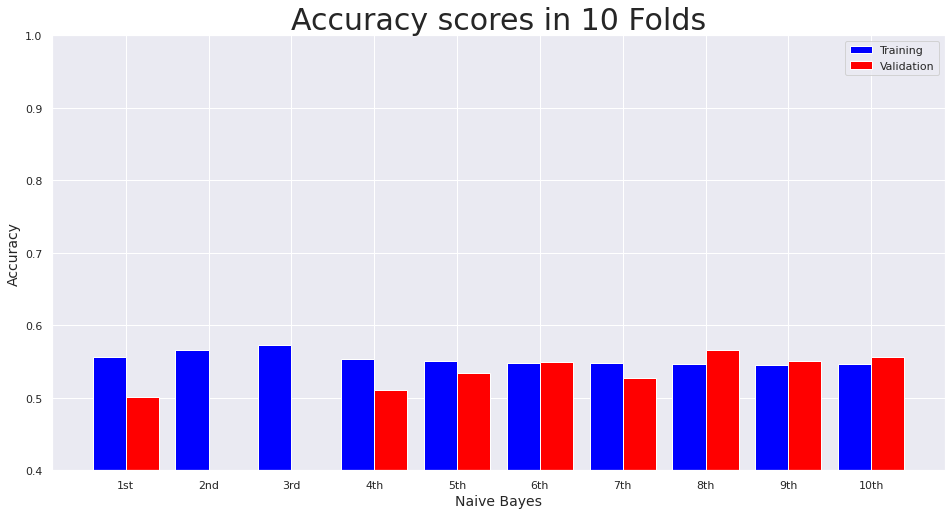

In [ ]:
model = "Naive Bayes"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            nbc_result["Training Accuracy scores"],
            nbc_result["Validation Accuracy scores"])

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc_result = cross_validation(rfc, x_sm, y_sm, 10)
print(rfc_result)

{'Training Accuracy scores': array([0.92587326, 0.93529464, 0.92987913, 0.90072876, 0.89984003,
       0.89619623, 0.90206186, 0.89788482, 0.89815144, 0.90019552]), 'Mean Training Accuracy': 90.86105685024546, 'Training Precision scores': array([0.93866715, 0.94672505, 0.94270547, 0.91897417, 0.9207032 ,
       0.91477484, 0.92107223, 0.91247466, 0.91869159, 0.91717621]), 'Mean Training Precision': 0.9251964574368484, 'Training Recall scores': array([0.91130466, 0.92248889, 0.91539282, 0.87895485, 0.87504444,
       0.87380021, 0.87948809, 0.88019908, 0.87362247, 0.87984358]), 'Mean Training Recall': 0.8890139084409686, 'Training F1 scores': array([0.92478355, 0.93444985, 0.92884841, 0.89851912, 0.89729336,
       0.89381818, 0.89979996, 0.89604632, 0.89559038, 0.89812211]), 'Mean Training F1 Score': 0.9067271240700816, 'Validation Accuracy scores': array([0.5243805 , 0.40927258, 0.464     , 0.8248    , 0.8256    ,
       0.8688    , 0.8032    , 0.836     , 0.844     , 0.8248    ]), 'M

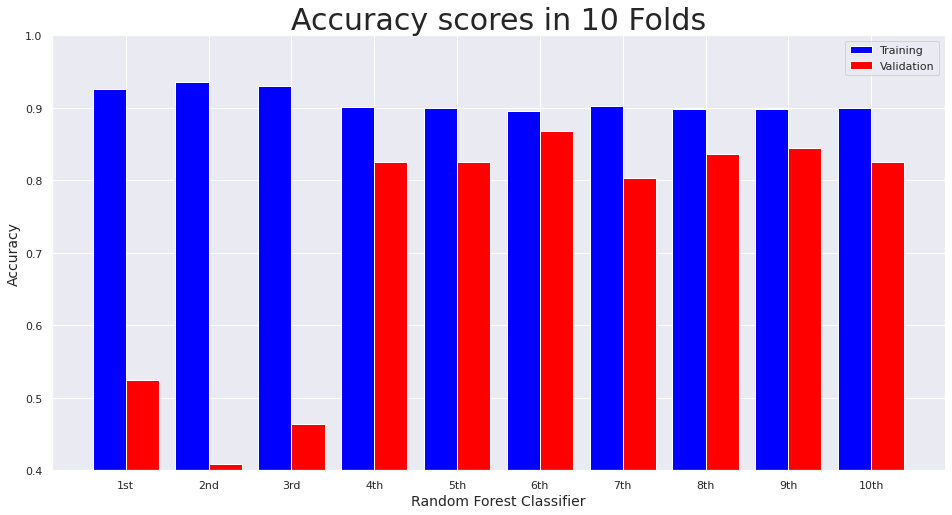

In [ ]:
model = "Random Forest Classifier"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            rfc_result["Training Accuracy scores"],
            rfc_result["Validation Accuracy scores"])

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.7703202 , 0.77017868, 0.77017868, 0.77017868, 0.77017868])

### Train-Test Split

#### Decision Tree

In [ ]:
# 0.7 Train & 0.3 Test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_f,y_sm,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
model = decision_tree_model.fit(x_train, y_train)
 
training_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)
print(training_prediction)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
#Performance in Data Training
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_prediction, digits=2))
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      4311
         1.0       0.95      0.66      0.77      4440

    accuracy                           0.81      8751
   macro avg       0.84      0.81      0.80      8751
weighted avg       0.84      0.81      0.80      8751

[[4142  169]
 [1527 2913]]


In [ ]:
#Performance in Data Testing
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_test, test_prediction, digits=2))
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      1940
         1.0       0.89      0.63      0.74      1811

    accuracy                           0.78      3751
   macro avg       0.81      0.78      0.78      3751
weighted avg       0.81      0.78      0.78      3751

[[1796  144]
 [ 664 1147]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1152x648 with 0 Axes>

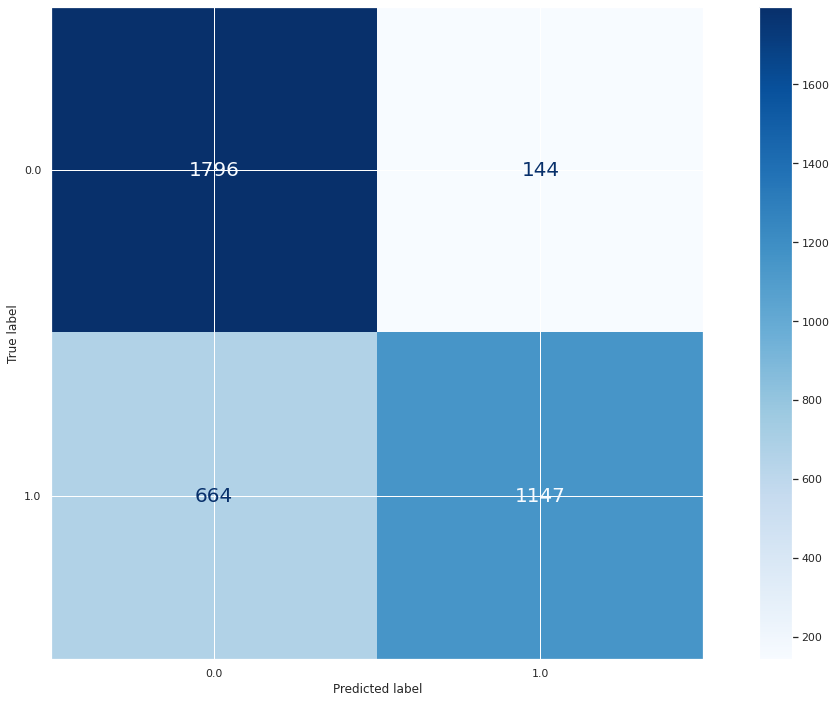

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize = (16, 9))
color = 'white'
cf = plot_confusion_matrix(decision_tree_model, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

training_prediction = rfc.predict(x_train)
test_prediction = rfc.predict(x_test)
print(training_prediction)

[0. 0. 0. ... 0. 1. 0.]


In [ ]:
#Performance in Data Training
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_prediction, digits=2))
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83      4364
         1.0       0.93      0.67      0.78      4387

    accuracy                           0.81      8751
   macro avg       0.84      0.81      0.81      8751
weighted avg       0.84      0.81      0.81      8751

[[4143  221]
 [1450 2937]]


In [ ]:
#Performance in Data Testing
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_test, test_prediction, digits=2))
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77      1887
         1.0       0.84      0.57      0.68      1864

    accuracy                           0.73      3751
   macro avg       0.76      0.73      0.72      3751
weighted avg       0.76      0.73      0.72      3751

[[1682  205]
 [ 804 1060]]
